# Proyek Tugas Akhir: Liver Disease Prediction
- **Mahasiwa 1**:
Aoki Takeshi (33422003)
- **Mahasiwa 2**:
Neli Fauziyah (33422018)
- **Kelas:** IK-2A

## Business Problem

Menurut data WHO yang diterbitkan pada tahun 2017, kematian akibat penyakit hati di India mencapai 259.749 atau 2,95% dari total kematian. Proyek ini bertujuan untuk mengklasifikasikan data dan memberikan wawasan yang berguna yang dapat membantu para dokter.

Dataset yang digunakan untuk klasifikasi diperoleh dari kaggle. Dataset ini berisi data tentang senyawa kimia yang diperoleh dari tes seperti SGOT, SGPT yang menyebutkan apakah pasien perlu didiagnosis atau tidak.

## Import Library

In [797]:
# for numerical computing
import numpy as np

# for dataframes
import pandas as pd

# for easier visualization
import seaborn as sns

# for visualization and to display plots
from matplotlib import pyplot as plt
%matplotlib inline

# import color maps
from matplotlib.colors import ListedColormap

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

# to split train and test set
from sklearn.model_selection import train_test_split

# to perform hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# Machine Learning Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix


## Data Wragling

In [798]:
df=pd.read_csv('indian_liver_patient.csv')

In [799]:
df.shape

(583, 11)

In [800]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [801]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


## Exploratory Data Analysis

In [802]:
df.dtypes[df.dtypes=='object']

Gender    object
dtype: object

## Distribution of Numerical Features

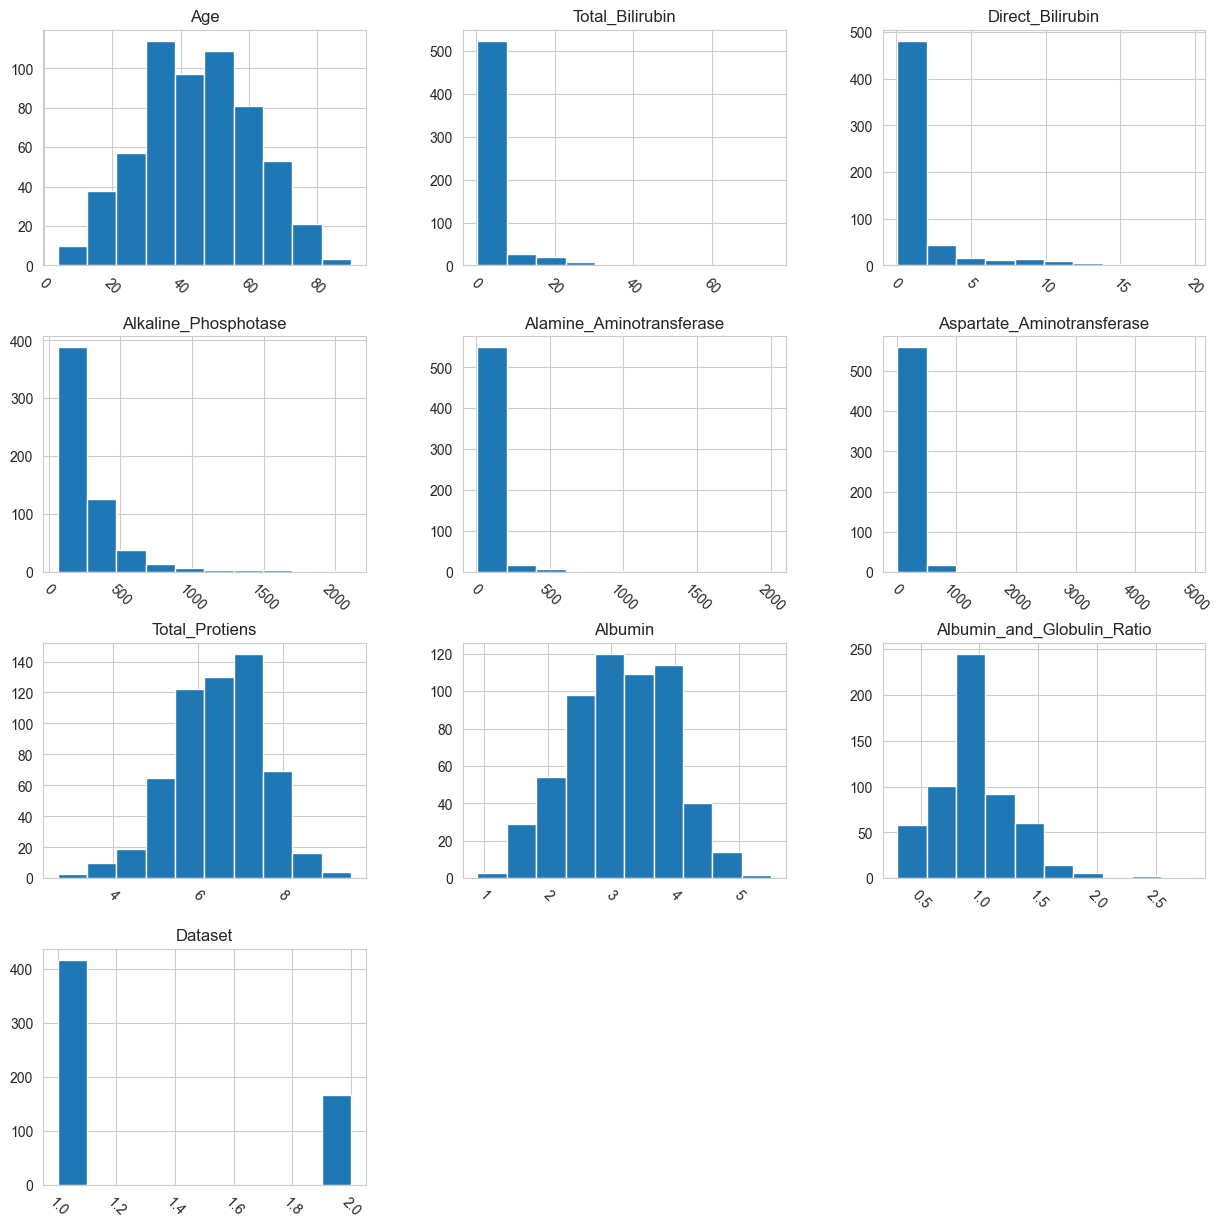

In [803]:
# Plot histogram grid
df.hist(figsize=(15,15), xrot=-45, bins=10) ## Display the labels rotated by 45 degress

# Clear the text "residue"
plt.show()

In [804]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [805]:
## if score==negative, mark 0 ;else 1
def partition(x):
    if x == 2:
        return 0
    return 1

df['Dataset'] = df['Dataset'].map(partition)

## Distribution of categorical data

In [806]:
df.describe(include=['object'])

,Gender
count,583
unique,2
top,Male
freq,441


## Bar plots for categorical Features

<Axes: xlabel='count', ylabel='Gender'>

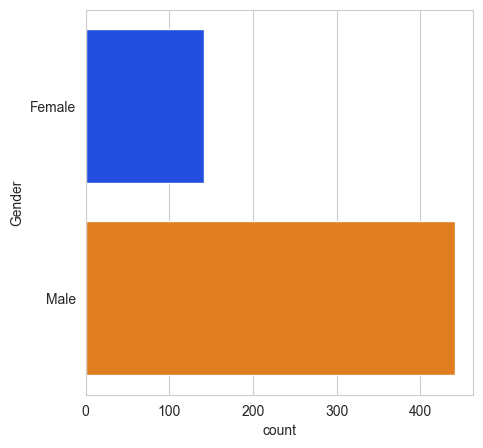

In [807]:
plt.figure(figsize=(5,5))
sns.countplot(y='Gender', palette='bright', data=df)

In [808]:
df[df['Gender'] == 'Male'][['Dataset', 'Gender']].head()

,Dataset,Gender
1,1,Male
2,1,Male
3,1,Male
4,1,Male
5,1,Male


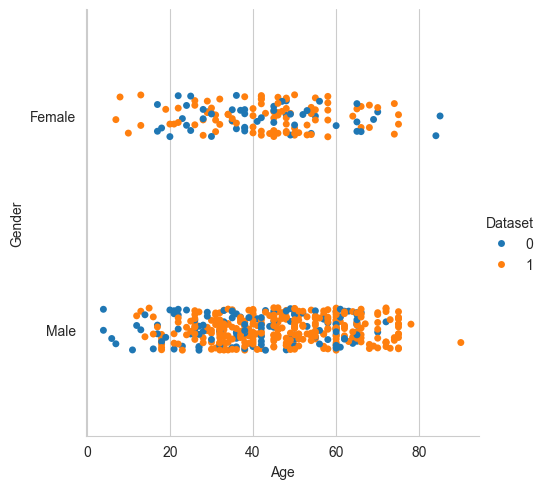

In [809]:
sns.catplot (x="Age", y="Gender", hue="Dataset", data=df);

Number of patients that are male:  441
Number of patients that are female:  142


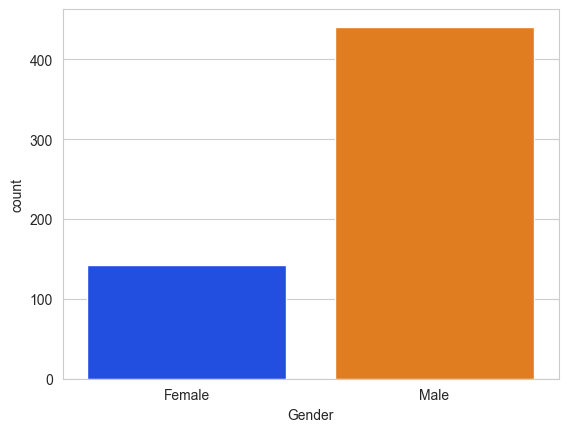

In [810]:
sns.countplot(data=df, x = 'Gender', label='Count', palette='bright')

M, F = df['Gender'].value_counts()
print('Number of patients that are male: ',M)
print('Number of patients that are female: ',F)

In [811]:
## if score==negative, mark 0 ;else 1
def partition(x):
    if x =='Male':
        return 0
    return 1

df['Gender'] = df['Gender'].map(partition)

### 2-D Scatter Plot

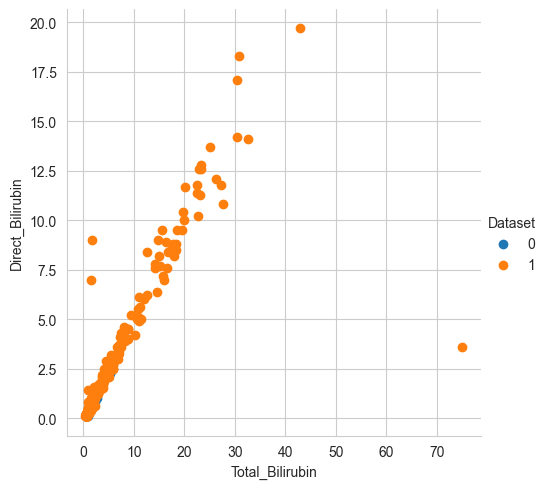

In [812]:
sns.set_style('whitegrid')   ## Background Grid
sns.FacetGrid(df, hue = 'Dataset', height = 5).map(plt.scatter, 'Total_Bilirubin', 'Direct_Bilirubin').add_legend()

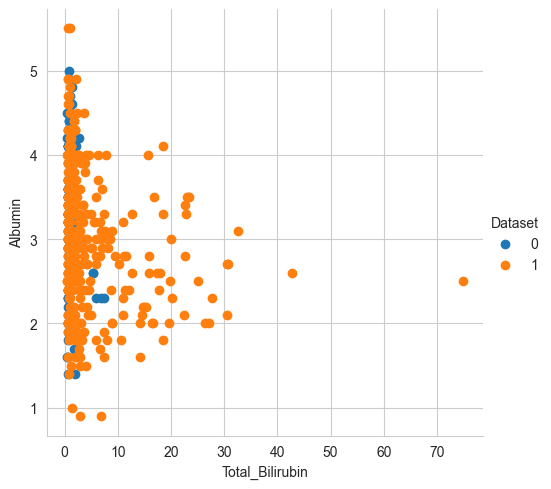

In [813]:
sns.set_style('whitegrid')   ## Background Grid
sns.FacetGrid(df, hue = 'Dataset', height = 5).map(plt.scatter, 'Total_Bilirubin', 'Albumin').add_legend()

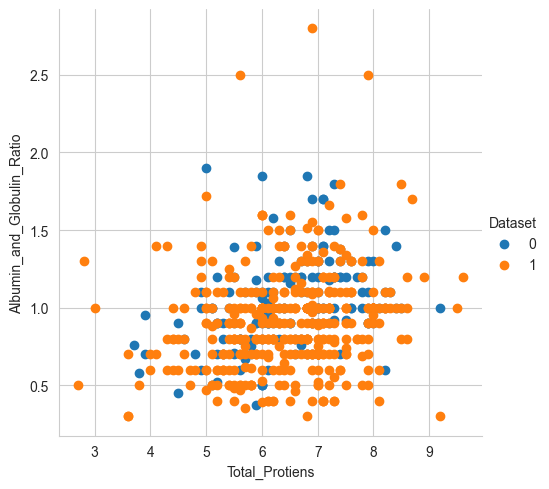

In [814]:
sns.set_style('whitegrid')   ## Background Grid
sns.FacetGrid(df, hue = 'Dataset', height = 5).map(plt.scatter, 'Total_Protiens', 'Albumin_and_Globulin_Ratio').add_legend()

## Correlations

In [815]:
df.corr()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Age,1.000000,-0.056560,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216408,0.137351
Gender,-0.056560,1.000000,-0.089291,-0.100436,0.027496,-0.082332,-0.080336,0.089121,0.093799,0.003424,-0.082416
Total_Bilirubin,0.011763,-0.089291,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206267,0.220208
Direct_Bilirubin,0.007529,-0.100436,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200125,0.246046
Alkaline_Phosphotase,0.080425,0.027496,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.234166,0.184866
Alamine_Aminotransferase,-0.086883,-0.082332,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002375,0.163416
Aspartate_Aminotransferase,-0.019910,-0.080336,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070040,0.151934
Total_Protiens,-0.187461,0.089121,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.234887,-0.035008
Albumin,-0.265924,0.093799,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.689632,-0.161388
Albumin_and_Globulin_Ratio,-0.216408,0.003424,-0.206267,-0.200125,-0.234166,-0.002375,-0.070040,0.234887,0.689632,1.000000,-0.163131


<Axes: >

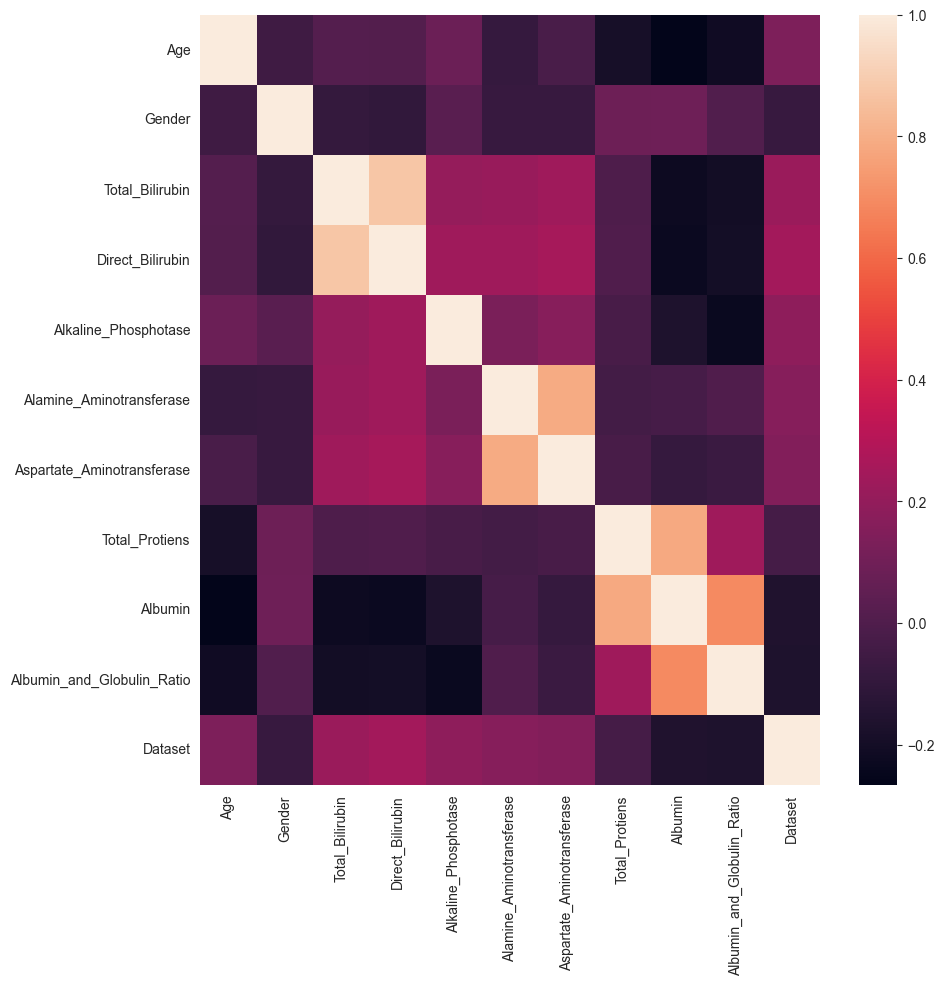

In [816]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())

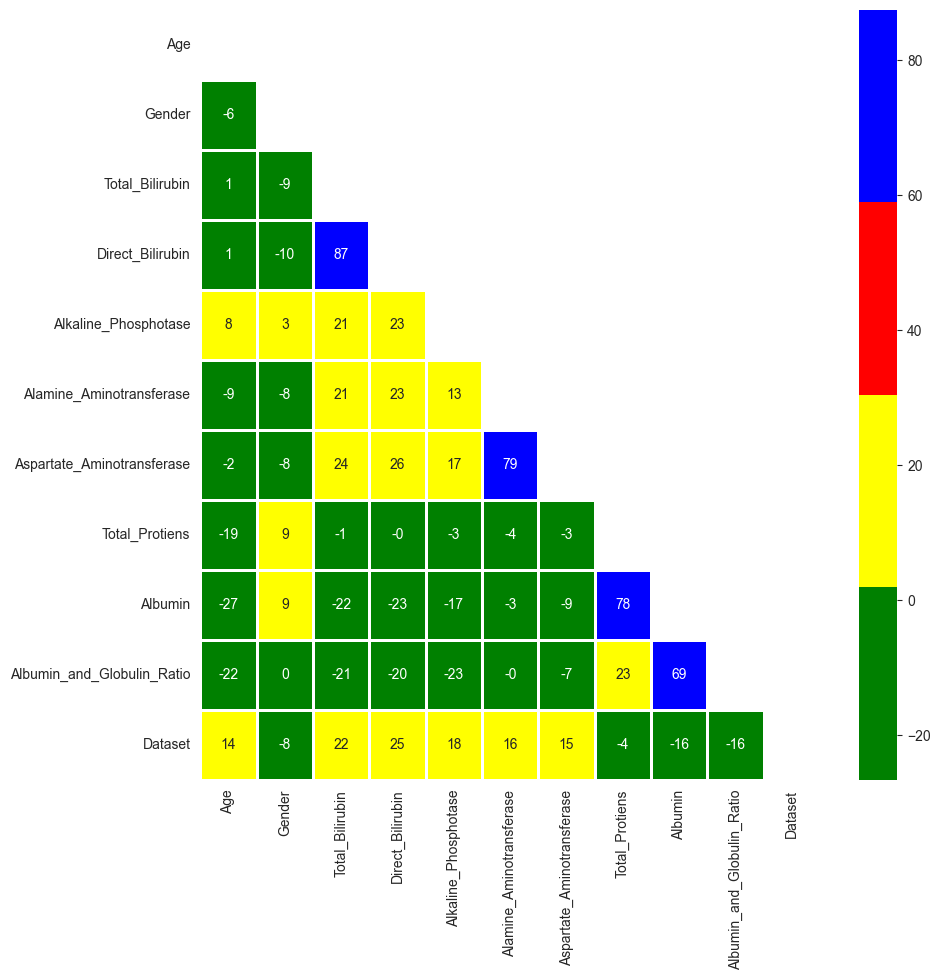

In [817]:
mask=np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10,10))
with sns.axes_style("white"):
    ax = sns.heatmap(df.corr()*100, mask=mask, fmt='.0f', annot=True, lw=1, cmap=ListedColormap(['green', 'yellow', 'red','blue']))

## Data Cleaning

In [818]:
df = df.drop_duplicates()
print( df.shape )

(570, 11)


## Removing Outliers

<Axes: ylabel='Aspartate_Aminotransferase'>

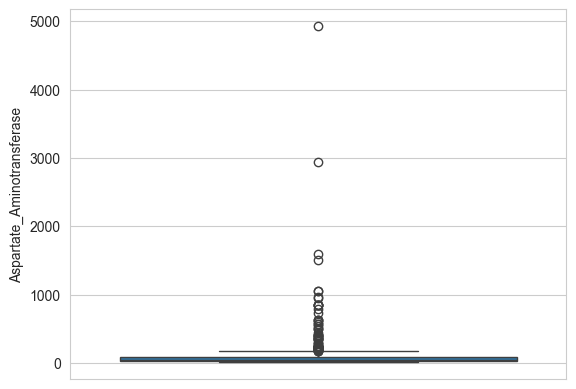

In [819]:
sns.boxplot(df.Aspartate_Aminotransferase)

In [820]:
df.Aspartate_Aminotransferase.sort_values(ascending=False).head()

135    4929
117    2946
118    1600
207    1500
199    1050
Name: Aspartate_Aminotransferase, dtype: int64

In [821]:
df = df[df.Aspartate_Aminotransferase <=3000 ]
df.shape

(569, 11)

<Axes: ylabel='Aspartate_Aminotransferase'>

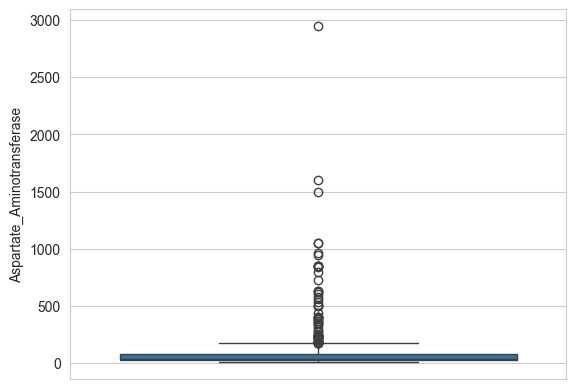

In [822]:
sns.boxplot(df.Aspartate_Aminotransferase)

In [823]:
df.Aspartate_Aminotransferase.sort_values(ascending=False).head()

117    2946
118    1600
207    1500
119    1050
199    1050
Name: Aspartate_Aminotransferase, dtype: int64

In [824]:
df = df[df.Aspartate_Aminotransferase <=2500 ]
df.shape

(568, 11)

In [825]:
df.isnull().values.any()

True

In [826]:
df=df.dropna(how='any')

In [827]:
df.shape

(564, 11)

In [828]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40,1


## Machine Learning Models

### Data Preparation

In [829]:
# Create separate object for target variable
y = df.Dataset

# Create separate object for input features
X = df.drop('Dataset', axis=1)

In [830]:
# Split X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=1234,
                                                    stratify=df.Dataset)

In [831]:
# Print number of observations in X_train, X_test, y_train, and y_test
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(451, 10) (113, 10) (451,) (113,)


#### Data standardization

In [832]:
train_mean = X_train.mean()
train_std = X_train.std()

In [833]:
## Standardize the train data set
X_train = (X_train - train_mean) / train_std

In [834]:
## Check for mean and std dev.
X_train.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
count,4.510000e+02,4.510000e+02,4.510000e+02,4.510000e+02,4.510000e+02,4.510000e+02,4.510000e+02,4.510000e+02,4.510000e+02,4.510000e+02
mean,1.378547e-16,-8.271285e-17,-3.938707e-18,1.772418e-17,6.301931e-17,-7.877414e-18,-2.363224e-17,1.486862e-15,1.417935e-16,-3.150966e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.459710e+00,-5.980292e-01,-4.613674e-01,-5.013974e-01,-9.009611e-01,-3.943772e-01,-4.865614e-01,-3.476087e+00,-2.818030e+00,-2.023543e+00
25%,-7.595886e-01,-5.980292e-01,-3.996190e-01,-4.658144e-01,-4.636908e-01,-3.157860e-01,-4.017376e-01,-6.503894e-01,-7.121980e-01,-6.338007e-01
50%,2.975347e-02,-5.980292e-01,-3.687448e-01,-4.302314e-01,-3.270438e-01,-2.432402e-01,-3.056039e-01,7.882282e-02,3.103678e-02,1.145223e-01
75%,7.583769e-01,1.668451e+00,-1.063141e-01,-7.440091e-02,2.042996e-02,-9.814860e-02,-7.092474e-02,6.257320e-01,8.362078e-01,4.199603e-01
max,2.762091e+00,1.668451e+00,1.105471e+01,6.472879e+00,7.090935e+00,9.701578e+00,8.504762e+00,2.813368e+00,2.880103e+00,5.612406e+00


In [835]:
## Note: We use train_mean and train_std_dev to standardize test data set
X_test = (X_test - train_mean) / train_std

In [836]:
## Check for mean and std dev. - not exactly 0 and 1
X_test.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
count,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000
mean,0.109816,-0.216940,-0.062052,-0.033465,-0.048222,-0.017203,0.007819,-0.082507,-0.175052,-0.218486
std,0.937258,0.851421,0.835512,1.046110,0.734043,0.661163,0.874507,0.962887,0.922474,0.851370
min,-2.338273,-0.598029,-0.445930,-0.501397,-0.768218,-0.394377,-0.469597,-2.655723,-2.198667,-1.718105
25%,-0.577433,-0.598029,-0.399619,-0.465814,-0.444170,-0.321831,-0.401738,-0.741541,-0.836070,-0.801792
50%,0.090472,-0.598029,-0.384182,-0.430231,-0.342661,-0.261377,-0.316914,-0.012329,-0.216708,-0.190916
75%,0.940533,-0.598029,-0.198937,-0.181150,-0.018612,-0.007466,-0.034168,0.625732,0.526527,0.114522
max,1.851312,1.668451,4.231512,5.974717,3.147694,4.834965,4.263572,2.175308,2.136869,2.558026


### Model Random Forest

In [837]:
tuned_params = {'n_estimators': [100, 200, 300, 400, 500], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
model = RandomizedSearchCV(RandomForestClassifier(), tuned_params, n_iter=15, scoring = 'roc_auc', n_jobs=-1)
model.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=15, n_jobs=-1,
                   param_distributions={'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   scoring='roc_auc')

In [838]:
model.best_estimator_

RandomForestClassifier(min_samples_leaf=4, min_samples_split=5,
                       n_estimators=200)

In [839]:
y_train_pred = model.predict(X_train)

In [840]:
y_pred = model.predict(X_test)

In [841]:
# Get just the prediction for the positive class (1)
y_pred_proba = model.predict_proba(X_test)[:,1]

In [842]:
# Display first 10 predictions
y_pred_proba[:10]

array([0.6131521 , 0.62724541, 0.64876436, 0.56491205, 0.33708707,
       0.9834026 , 0.50885012, 0.45444326, 0.95144444, 0.37299248])

In [843]:
confusion_matrix(y_test, y_pred).T

array([[ 5, 13],
       [27, 68]], dtype=int64)

In [844]:
# Calculate ROC curve from y_test and pred
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

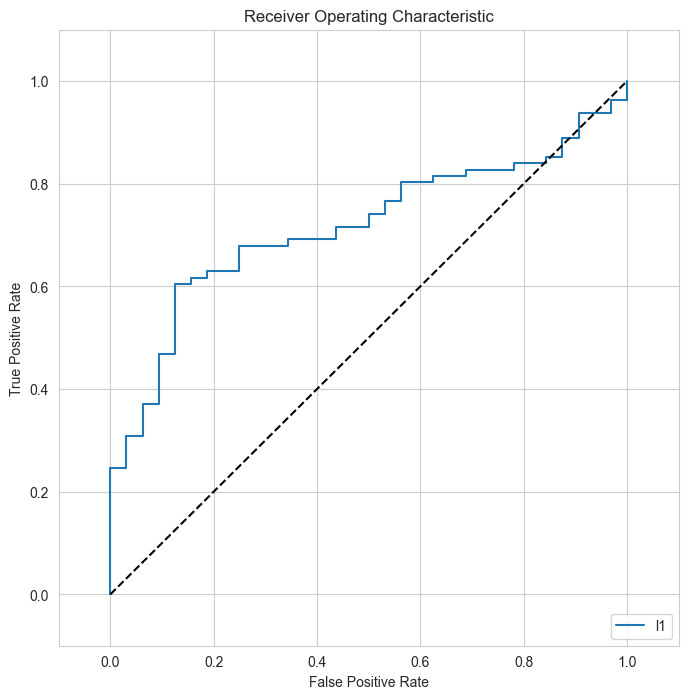

In [845]:
# Plot the ROC curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [846]:
# Calculate AUC for Train set
roc_auc_score(y_train, y_train_pred)

0.8930385813563383

In [847]:
# Calculate AUC for Test set
print(auc(fpr, tpr))

0.7156635802469135


#### Feature Importance

In [848]:
## Building the model again with the best hyperparameters
model = RandomForestClassifier(n_estimators=500, min_samples_split=2, min_samples_leaf=4)
model.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=4, n_estimators=500)

In [849]:
indices = np.argsort(-model.feature_importances_)
print("The features in order of importance are:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

The features in order of importance are:
--------------------------------------------------
Alkaline_Phosphotase
Total_Bilirubin
Aspartate_Aminotransferase
Alamine_Aminotransferase
Age
Direct_Bilirubin
Albumin
Albumin_and_Globulin_Ratio
Total_Protiens
Gender
